# Brecha Salarial de Género en Argentina

Este proyecto fue realizado por el grupo 15 constituido por Daniela Ferraro y Jorgelina Sigal. Se utilizó un conjunto de datos provenientes del Ministerio de Trabajo, Empleo y Seguridad Social que contiene información sobre las remuneraciones en Argentina, desagregadas por género, tipo de industria y fecha. El objetivo es analizar las brechas salariales de género y su evolución. 

### Dataset
https://www.trabajo.gob.ar/estadisticas/oede/empleoyremuneracion.asp

### Contenido del dataset
#### Periodo: 
Indica año y mes al que corresponde la remuneración.
#### Industria: 
Nombre del sector o rama de actividad económica.
#### Género: 
Género del grupo de trabajadores al que pertenece la remuneración.
#### Mujer: 
Variable binaria (1 o 0) toma el valor 1 si es mujer, 0 si no. Útil para análisis estadístico, modelos y gráficos.
#### Varon: 
Variable binaria (1 o 0) toma el valor 1 si es varón, 0 si no. Útil para análisis estadístico, modelos y gráficos.
#### Remuneración: 
Remuneración promedio mensual para ese sector, género y período (en pesos argentinos).

### Objetivo general
Analizar la evolución de la remuneración media del empleo registrado en el sector privado en Argentina, según rama de actividad y sexo, en el período comprendido entre enero de 1996 y octubre de 2022, utilizando herramientas de data science, con el fin de identificar patrones, desigualdades y tendencias vinculadas a la brecha salarial de género en el mundo laboral.

### Objetivos específicos
- Procesar y limpiar el conjunto de datos proporcionado mediante herramientas de data science, utilizando bibliotecas como pandas para su análisis exploratorio.

- Describir la evolución temporal de la remuneración media del empleo registrado en el sector privado, diferenciando por sexo y rama de actividad (según el CIIU rev. 3 a dos dígitos).

- Comparar las trayectorias salariales entre varones y mujeres en los distintos sectores de actividad, identificando las ramas con mayores y menores brechas de género.

- Visualizar los resultados mediante gráficos que faciliten la comprensión de las desigualdades salariales en el período analizado.

- Reflexionar sobre las implicancias sociales y económicas de las desigualdades de género en el mundo laboral formal, a partir de los hallazgos del análisis de datos.

### Tecnologías
- Python 3
- Pandas
- Jupyter Notebook
- Visual Studio Code
- Matplotlib 
- Seaborn
- Scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Exploración de los datos

In [2]:
remuneraciones1 = pd.read_csv('Remuneraciones (1).csv', header=None)

In [3]:
# Muestra las primeras 5 filas
print(remuneraciones1.head())

                 0                        1                        2    \
0  Período (mes año)  agricultura y ganaderia  agricultura y ganaderia   
1                NaN                  Mujeres                  Varones   
2             ene-96                    380.2                    399.8   
3             feb-96                    406.8                    398.1   
4             mar-96                    399.7                    393.3   

                                  3                                   4    \
0  Silvicultura, extracción de madera  Silvicultura, extracción de madera   
1                             Mujeres                             Varones   
2                               426.2                               335.1   
3                                 416                               338.7   
4                               416.5                               324.2   

                                             5    \
0  Pesca y actividades relacionadas con 

In [4]:
# Devuelve un objeto Index con los nombres
print(remuneraciones1.columns)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114],
      dtype='int64', length=115)


In [5]:
# Muestra el tipo de dato de cada columna
print(remuneraciones1.dtypes)

0      object
1      object
2      object
3      object
4      object
        ...  
110    object
111    object
112    object
113    object
114    object
Length: 115, dtype: object


In [6]:
# Incluye nombre de columnas, tipos de datos y valores no nulos
remuneraciones1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Columns: 115 entries, 0 to 114
dtypes: object(115)
memory usage: 291.2+ KB


In [7]:
# Estadisticas descriptivas 
print(remuneraciones1.describe())

                      0    1      2      3      4      5       6    \
count                 323  324    324    324    324    324     324   
unique                323  319    318    321    320    322     323   
top     Período (mes año)  405  391.1  399.4  310.9  665.1  1386.9   
freq                    1    3      2      2      2      2       2   

                                               7    \
count                                          324   
unique                                         324   
top     Extracción de petróleo crudo y gas natural   
freq                                             1   

                                               8    \
count                                          324   
unique                                         324   
top     Extracción de petróleo crudo y gas natural   
freq                                             1   

                                        9    ...    105    106    107     108  \
count                     

In [8]:
# Valores nulos o faltantes
print(remuneraciones1.isnull().sum())

0      1
1      0
2      0
3      0
4      0
      ..
110    0
111    0
112    0
113    0
114    0
Length: 115, dtype: int64


## Transformación del dataset de remuneraciones

1. Se parte de un dataset reducido para facilitar el análisis y tener un objetivo claro (hoja numero C1.5 del dataset original).
2. Se convierte el dataset de formato horizontal a vertical.
3. Se extraen encabezados que estaban en múltiples filas.
4. Se ajustan nombres de columnas y se separan variables combinadas.
5. Se guarda el resultado limpio en un nuevo archivo CSV.


In [9]:
remuneraciones1 = pd.read_csv('Remuneraciones (1).csv', header=None)
industria_header = remuneraciones1.iloc[0]
genero_header = remuneraciones1.iloc[1]
remuneraciones1_data = remuneraciones1.iloc[2:].reset_index(drop=True)
remuneraciones1_data.columns = pd.MultiIndex.from_arrays([industria_header, genero_header])
remuneraciones1_data.columns = [
    "Periodo" if i == 0 else f"{col[0]}_{col[1]}" 
    for i, col in enumerate(remuneraciones1_data.columns)
]

# Corrección en nombre de variable
remuneraciones = remuneraciones1_data.melt(id_vars='Periodo', var_name='Industria_Genero', value_name='Valor')

# Filtrar filas bien formateadas
remuneraciones = remuneraciones[remuneraciones['Industria_Genero'].str.count('_') == 1]

# Separar en dos columnas
remuneraciones[['Industria', 'Genero']] = remuneraciones['Industria_Genero'].str.split('_', expand=True)

# Reordenar columnas
remuneraciones = remuneraciones[['Periodo', 'Industria', 'Genero', 'Valor']]

# Guardar archivo final
remuneraciones.to_csv("Remuneraciones.csv", index=False)

print(remuneraciones)


      Periodo                Industria   Genero     Valor
0      ene-96  agricultura y ganaderia  Mujeres     380.2
1      feb-96  agricultura y ganaderia  Mujeres     406.8
2      mar-96  agricultura y ganaderia  Mujeres     399.7
3      abr-96  agricultura y ganaderia  Mujeres     375.9
4      may-96  agricultura y ganaderia  Mujeres     395.6
...       ...                      ...      ...       ...
36703  jun-22              sin definir  Varones    129089
36704  jul-22              sin definir  Varones   92970.8
36705  ago-22              sin definir  Varones  106303.9
36706  sep-22              sin definir  Varones  117695.4
36707  oct-22              sin definir  Varones  129083.9

[36708 rows x 4 columns]


In [10]:
# Ver cuántos valores únicos hay en 'Industria'
print(remuneraciones['Industria'].nunique())

57


In [11]:
# Ver todos los valores únicos en 'Industria'
print(remuneraciones['Industria'].unique())

['agricultura y ganaderia' 'Silvicultura, extracción de madera'
 'Pesca y actividades relacionadas con la pesca'
 'Extracción de petróleo crudo y gas natural'
 'Extracción de minerales metalíferos'
 'Explotación de otras minas y canteras' 'Alimentos' 'Tabaco'
 'Productos textiles' 'Confecciones' 'Cuero' 'Madera' 'Papel' 'Edición'
 'Productos de petróleo' 'Productos químicos'
 'Productos de caucho y plástico' 'Otros minerales no metálicos'
 'Metales comunes' 'Otros productos de metal' 'Maquinaria y equipo'
 'Maquinaria de oficina' 'Aparatos eléctricos' 'Radio y televisión'
 'Instrumentos médicos' 'Automotores' 'Otros equipo de transporte'
 'Muebles' 'Reciclamiento de desperdicios y desechos'
 'Electricidad, gas y agua' 'Captación, depuración y distribución de agua'
 'Construcción'
 'Vta. y reparación de vehículos, vta. por menor de combustible'
 'Comercio al por mayor' 'Comercio al por menor'
 'Servicios de hotelería y restaurantes'
 'Transporte ferroviario y automotor y por tuberías'
 

### Mediante el analisis exploratorio de datos, el diagnostico de las columnas arrojo que el dataframe presenta las siguientes variables:
- Periodo: cuantitativa discreta. Unidades de tiempo.
- Industria: categorica/ cualitativa nominal. Representa categorias sin orden.
- Genero: categorica/ cualitativa nominal. Posee dos valores posibles.
- Valor: cuantitativa continua. Representa monto monetario.

In [12]:
# Se quitan puntos de miles
remuneraciones['Valor'] = remuneraciones['Valor'].str.replace('.', '', regex=False)
# Se reemplaza coma decimal por punto
remuneraciones['Valor'] = remuneraciones['Valor'].str.replace(',', '.', regex=False)
# Se convierte de object a float
remuneraciones['Valor'] = pd.to_numeric(remuneraciones['Valor'], errors='coerce')

In [15]:
# Se crea una variable binaria para la variable categorica genero
le = LabelEncoder()
remuneraciones['Genero_encoded'] = le.fit_transform(remuneraciones['Genero'])
remuneraciones['Genero_encoded'] = remuneraciones['Genero_encoded'].replace({0:1,1:0})

### 1. Brecha salarial por industria
##### Este gráfico compara los sueldos promedio de mujeres y varones en cada industria en todos los períodos disponibles. Es útil para identificar en qué sectores la brecha es mas pronunciada.

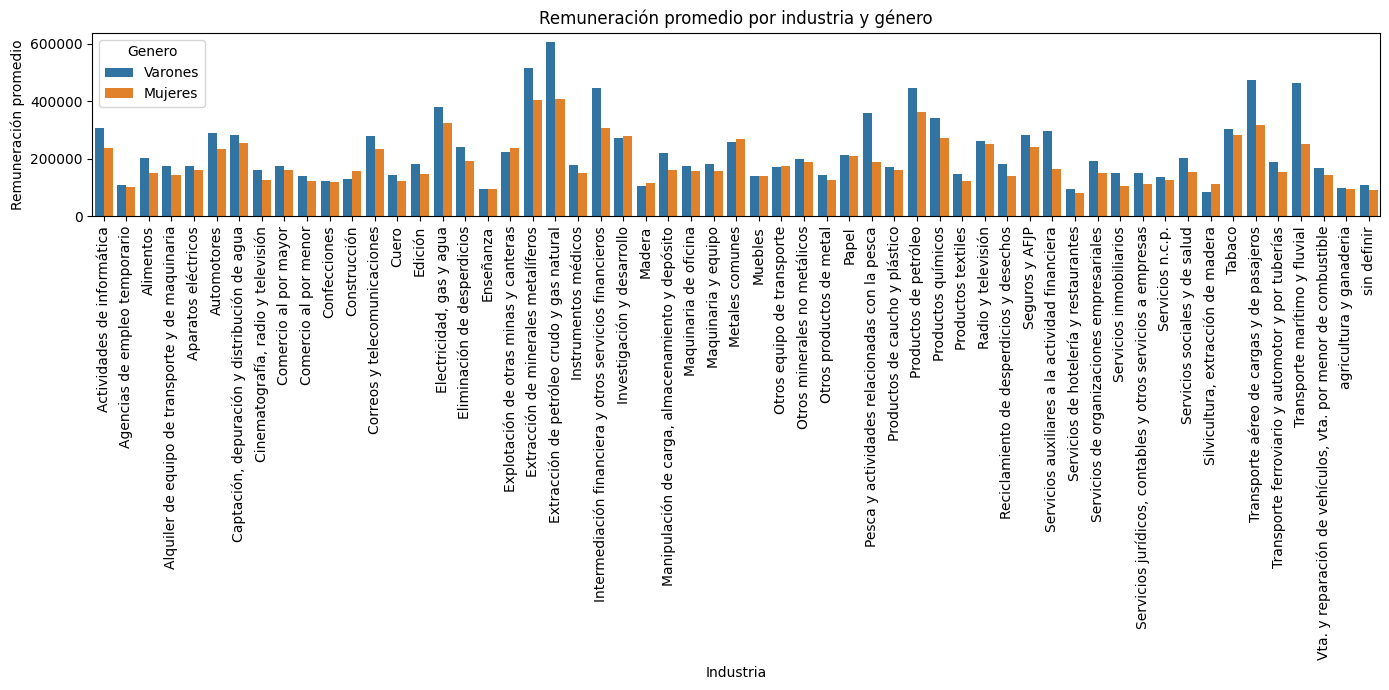

In [17]:
# Se agrupa el dataframe por lo que se quiere relacionar (industria y género)
industria_promedio = remuneraciones.groupby(['Industria', 'Genero'])['Valor'].mean().reset_index()
plt.figure(figsize=(14, 7))
# En el eje Y la remuneración promedio. Se generan dos barras por género
sns.barplot(data=industria_promedio, x='Industria', y='Valor', hue='Genero',hue_order=['Varones', 'Mujeres'])
plt.title('Remuneración promedio por industria y género')
plt.xticks(rotation=90)
plt.ylabel('Remuneración promedio')
plt.tight_layout()
plt.show()

### Mediante el resultado del gráfico se observa:
- En casi todas las industrias, los valores tienen un salario promedio mayor.
- Hay sectores donde la diferencia es particularmente marcada:
   - Intermediación financiera y seguros.
   - Extracción de petroleo y gas.
   - Servicios de transporte.
- Algunas industrias muestras brechas más reducidas o incluso situaciones donde las mujeres están ligeramente por encima, pero son excepcionales.

### 2. Evolución temporal de la brecha salarial
##### Este gráfico muestra como evolucionan en el tiempo las remuneraciones promedio de mujeres y varones. Permite observar si la brecha se mantiene, se reduce o se amplía a lo largo de los períodos.

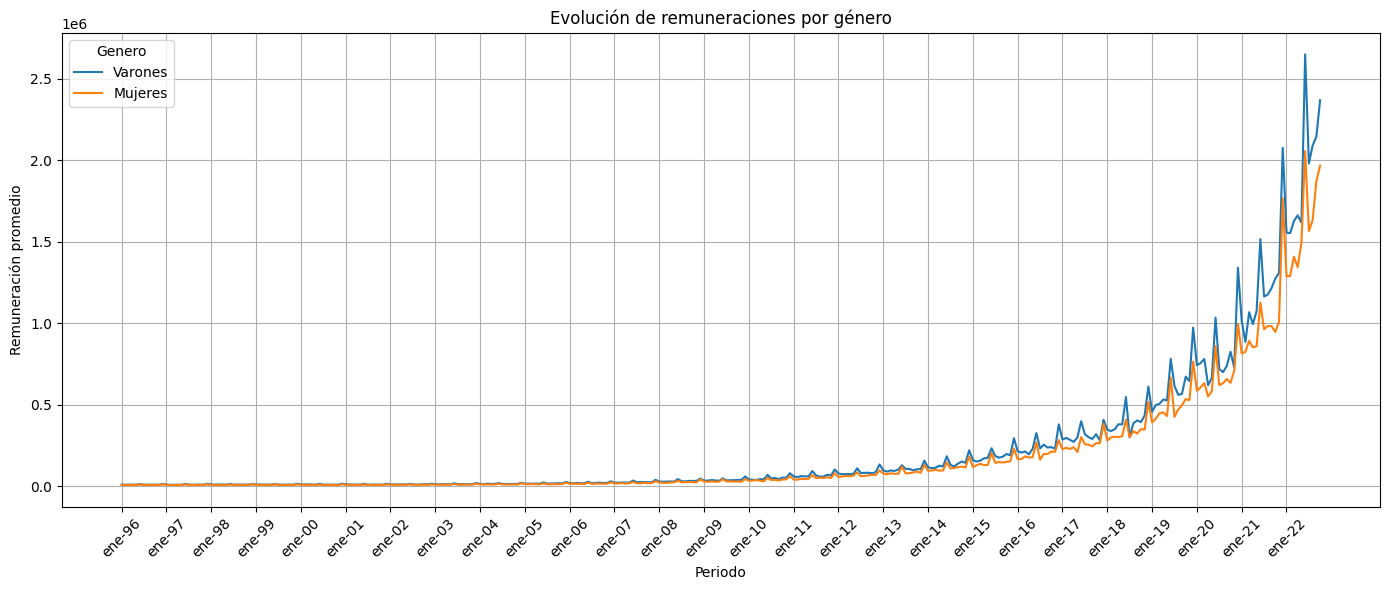

In [21]:
periodos = remuneraciones['Periodo'].unique()
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=remuneraciones,
    x='Periodo',
    y='Valor',
    # Una línea distinta para cada género
    hue='Genero', hue_order=['Varones', 'Mujeres'],
    # Se calcula la remuneración promedio por período
    estimator='mean',
    errorbar=None
)
plt.title('Evolución de remuneraciones por género')
plt.ylabel('Remuneración promedio')
plt.xticks(
    # Se toma una muestra por año
    ticks=np.arange(0, len(periodos), 12),  
    labels=periodos[::12],
    rotation=45
)
plt.grid(True)
plt.tight_layout()
plt.savefig("brecha_salarial.png", dpi=300, bbox_inches="tight")
plt.show()

### Mediante el resultado del gráfico se observa:
- Tendencia creciente esperable por efecto inflacionario.
- Línea de varones consistentemente por encima de mujeres, lo que indica una brecha salarial sostenida en el tiempo.
- Ampliación de la brecha en períodos recientes, lo que indica mayor desigualdad en ciertos fenómenos o contextos socio-económicos.

### 3. Distribucion de remuneraciones por genero
##### Este grafico sobre la distribución de remuneraciones por género muestra capas de información estadística que permiten detectar asimetrías, dispersión y desigualdades salariales.

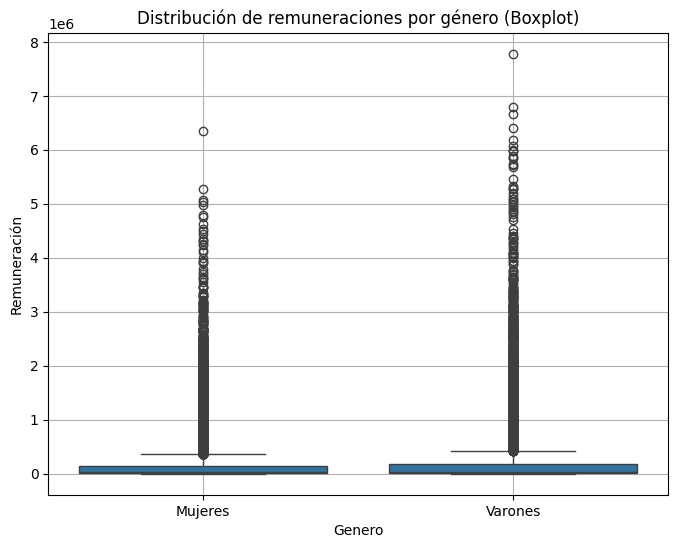

In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=remuneraciones, x='Genero', y='Valor')
plt.title('Distribución de remuneraciones por género (Boxplot)')
plt.ylabel('Remuneración')
plt.grid(True)
plt.show()

### Mediante el resultado del gráfico se observa:
- No se observa una gran brecha en la mediana de remuneraciones entre géneros, lo que puede llevar a pensar que los sueldos centrales son comparables.
- La desigualdad aparece al analizar los extremos; los sueldos más altos están más concentrados en varones, lo cual puede estar relacionado con acceso desigual a puestos jerárquicos.

## Conclusión general
##### El análisis gráfico muestra una brecha salarial de género persistente en Argentina. Si bien puede haber variaciones por industrias y momentos, la tendencia general favorece sistemáticamente a los varones. También, al observar la cantidad y amplitud de outliers se evidencia una mayor dispersión en los sueldos de los varonees con muchos más casos de remuneraciones elevadas, accediendo asi a niveles salariales más altos, demostrando así este patrón desigualdades estructurales cómo:
- Techos de cristal que limita el ascenso de mujeres en ciertas industrias o roles, que describe  barreras invisibles que enfrentan las mujeres para ascender profesionalmente, incluso teniendo las mismas calificaciones.
- Segregación ocupacional, donde las mujeres están sobrerrepresentads en sectores tradicionalmente feminizados como educación, salud, cuidados y son peor remunerados. En cambio, los varones se concentran en sectores más técnicos o estratégicos como tecnología, energía, finanzas donde los salarios promedio son más altos.
- Diferencias en oportunidades de liderazgo que se presentan en procesos de selección, promoción o evaluación dentro de empresas u organizaciones pueden estar influenciados por sesgos de género.
#### Por lo tanto, la brecha salarial de género no siempre se manifiesta en el promedio o la mediana, sino que se vuelve más visible al analizar los extremos de la distribución salarial, donde los varones predominan en los ingresos más altos.